In [45]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from icecream import ic

In [46]:
def get_ocr_results(image_path):
    reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
    result = reader.readtext(image_path)
    return result

In [47]:
result = get_ocr_results('mid2.png')
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[61, 55], [109, 55], [109, 69], [61, 69]], 'BEST', 0.9949224793095091),
 ([[28, 64], [136, 64], [136, 88], [28, 88]], 'INDIAN', 0.7508254909481061),
 ([[46, 86], [78, 86], [78, 94], [46, 94]], 'INE', 0.37824256782761667),
 ([[82, 86], [132, 86], [132, 94], [82, 94]], 'Icuamn', 0.019141849291046693),
 ([[47, 93], [119, 93], [119, 107], [47, 107]], 'PLAIDEM', 0.3273546691509429),
 ([[262, 1058], [462, 1058], [462, 1088], [262, 1088]],
  'The Stories Time',
  0.9996408382874409)]

In [48]:
def get_coordinates_for_text(data, target_text):
    matching_coordinates = []

    for item in data:
        coordinates, ocr_text, _ = item  # We ignore the confidence score here
        if target_text.lower() in ocr_text.lower() :  # Case-insensitive comparison
            matching_coordinates.append(coordinates)

    return matching_coordinates

# # Example data structure
# data = [
#     ([[61, 55], [109, 55], [109, 69], [61, 69]], 'BEST', 0.9949224793095091),
#     ([[28, 64], [136, 64], [136, 88], [28, 88]], 'INDIAN', 0.7508254909481061),
#     ([[46, 86], [78, 86], [78, 94], [46, 94]], 'INE', 0.37824256782761667),
#     ([[82, 86], [132, 86], [132, 94], [82, 94]], 'Icuamn', 0.019141849291046693),
#     ([[47, 93], [119, 93], [119, 107], [47, 107]], 'PLAIDEM', 0.3273546691509429),
#     ([[262, 1058], [462, 1058], [462, 1088], [262, 1088]], 'The Stories Time', 0.9996408382874409)
# ]

# # Example usage
# target_text = 'stories'
# print(get_coordinates_for_text(data, target_text))


In [49]:
tmp = get_coordinates_for_text(result,'stories')

ic| top_left: [262, 1058]
ic| top_left: [262, 1043]


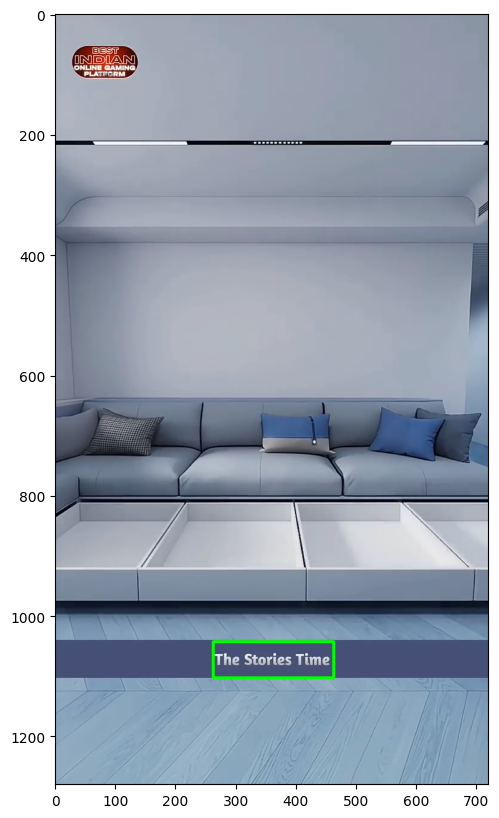

In [50]:
top_left = tmp[0][0]
ic(top_left)
bottom_right = tmp[0][2]

top_left[1]-=15
bottom_right[1]+=15
ic(top_left)
# text = tmp[0][1]
# font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread('mid2.png')
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
# img = cv2.putText(img,text,top_left, font, 0.5,(0,0,255),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))    
plt.imshow(img)
plt.show()